# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# done ---

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# done --

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# set number of API calls
import math
call_limit = 50
sets = math.ceil(len(cities)/call_limit)
print(sets)
13

# set up array for city sets
city_sets = np.array_split(cities, sets)
len(city_sets)
len(city_sets[0])

# OpenWeather url
url = "http://api.openweathermap.org/data/2.5/weather"

params = {
    "appid": weather_api_key,
    "units": "Imperial"
}

# json
response_list = []

print("Beginning Data Retrieval")     
print("-----------------------------")

# run through list, retun all OpenWeatherMap
for set_index, city_set in enumerate(city_sets):
    for city_index, city_set in enumerate(city_sets[set_index]):
        print(f"Processing Record {city_index} of Set {set_index+1} | {city_sets[set_index][city_index]}")
        params['q'] = city_sets[set_index][city_index]    
        
        response = requests.get(url, params=params)
        
        response_json = response.json()
        
        # validate entry
        if response_json['cod'] == 200:
            response_list.append(response_json)
        else:
            if response_json['cod'] == 404:
                print("City not found. Skipping...")
#   add break
    time.sleep(10)
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

# done ---

12
Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | vaini
Processing Record 1 of Set 1 | del rio
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | deputatskiy
Processing Record 4 of Set 1 | himora
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | svetlaya
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | banmo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | miri
Processing Record 16 of Set 1 | powell river
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | bolgatanga
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tafresh
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | new norfolk
Pr

In [ ]:
# Use list comprehensions to collect relevant data from response JSON objects.

city = [response.get('name') for response in response_list]
cloudiness = [response.get('clouds').get('all') for response in response_list]
country = [response.get('sys').get('country') for response in response_list]
dates = [response.get('dt') for response in response_list]
humidity = [response.get('main').get('humidity') for response in response_list]
lat = [response.get('coord').get('lat') for response in response_list]
long = [response.get('coord').get('lon') for response in response_list]
max_temp = [response.get('main').get('temp_max') for response in response_list]
wind = [response.get('wind').get('speed') for response in response_list]

# create city df
city_df = pd.DataFrame(list(zip(city, cloudiness, country,
                                     dates, humidity, lat, long, 
                                     max_temp, wind)), 
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# export csv
city_df.to_csv('city_weather_data.csv', index=False)

# values
city_df.count()

# done ---

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [9]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,75,TO,1587513953,78,-21.20,-175.20,82.40,10.29
1,Del Rio,40,US,1587513953,55,29.36,-100.90,87.80,16.11
2,Aklavik,75,CA,1587513953,66,68.22,-135.01,14.00,12.75
3,Deputatsky,100,RU,1587513953,92,69.30,139.90,19.13,1.48
4,Rikitea,77,PF,1587513953,75,-23.12,-134.97,77.29,10.58


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

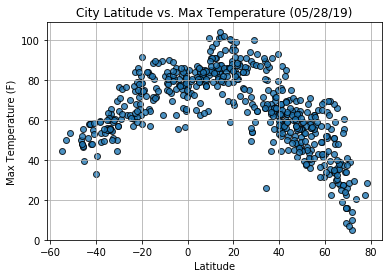

In [6]:
#do not run

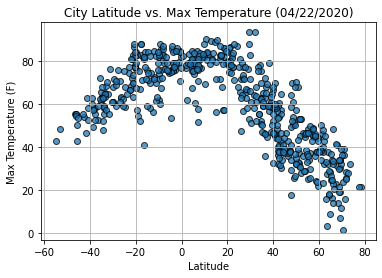

In [12]:
#do not run

#### Latitude vs. Humidity Plot

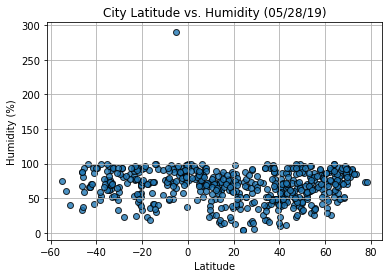

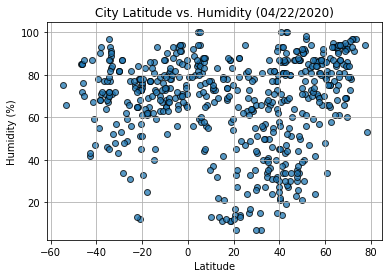

In [17]:
# format plot
plt.scatter(city_df['Lat'], city_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('lat_vs_humidity.png')
plt.show()

# done ---

#### Latitude vs. Cloudiness Plot

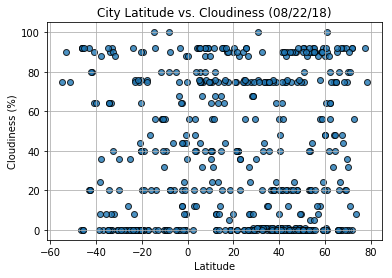

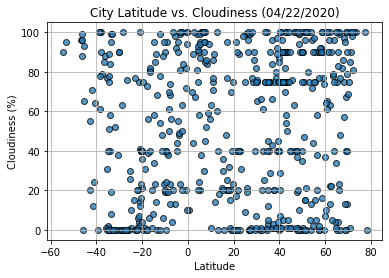

#### Latitude vs. Wind Speed Plot

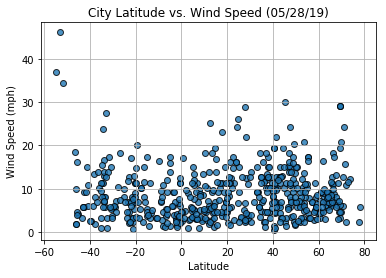

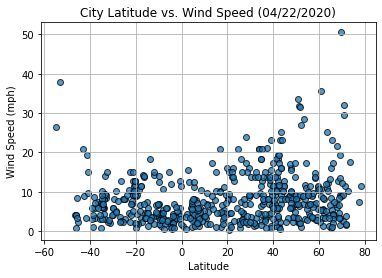

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


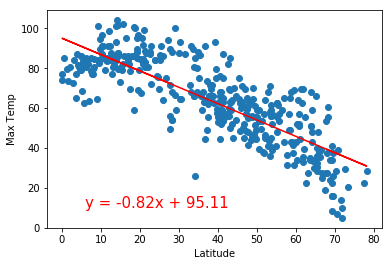

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


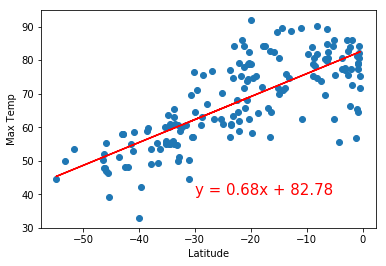

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


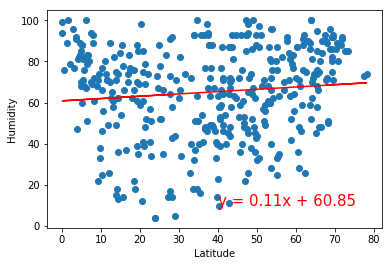

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


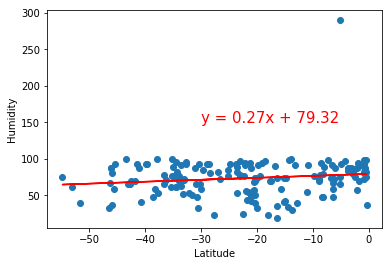

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


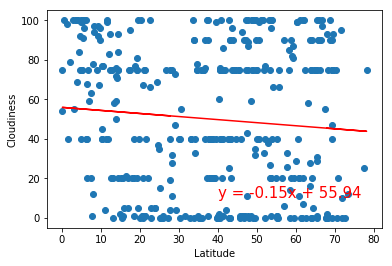

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


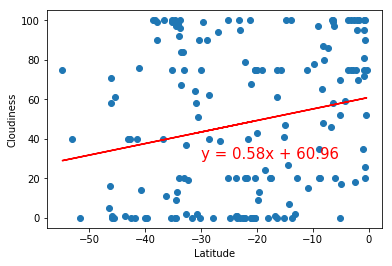

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


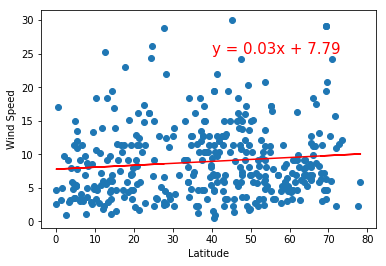

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


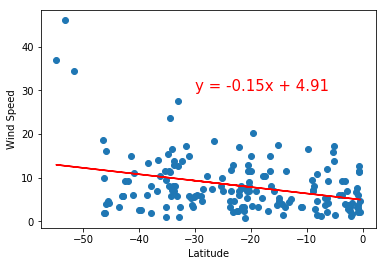